# Applying Naive-Bayes Classification

### Importing the Libraries Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
data=pd.read_excel('oasis_longitudinal_demographics.xlsx')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


### Applying Preprocessing Techniques

In [6]:
X = data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group'] 
y = y.apply(lambda x: 'Demented' if x in ['Demented', 'Converted'] else 'Not Demented')
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## NAIVE BAYES

In [7]:
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

    Demented       0.84      0.60      0.70        43
Not Demented       0.61      0.84      0.71        32

    accuracy                           0.71        75
   macro avg       0.73      0.72      0.71        75
weighted avg       0.74      0.71      0.71        75



### Visualizing the Results using Confusion Matrix

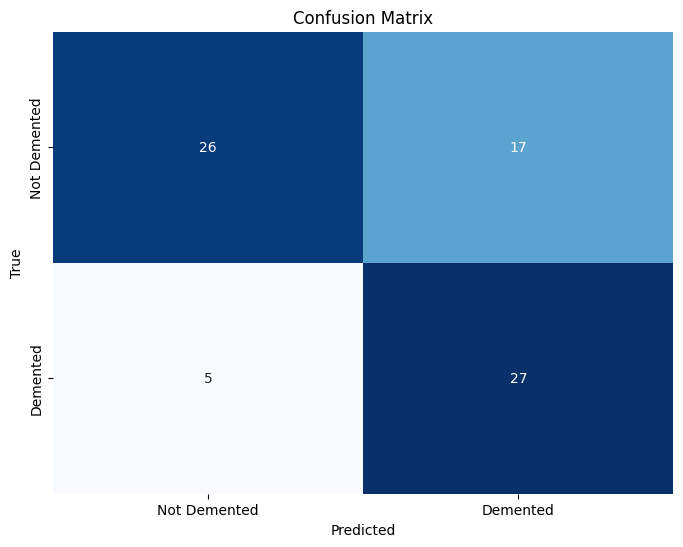

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Demented', 'Demented'], yticklabels=['Not Demented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


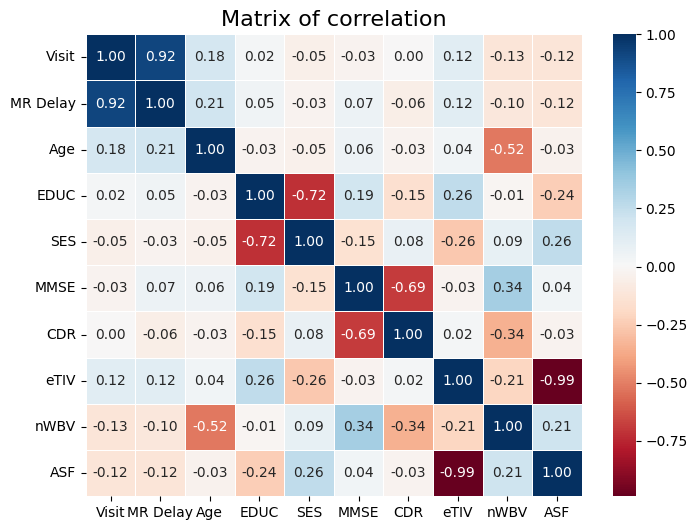

In [5]:
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar=True, cmap='RdBu')
plt.title('Matrix of correlation', size=16)
plt.show()
